In [48]:
import pandas as pd
import numpy as np
#reading the given pengins.csv file
df1=pd.DataFrame(pd.read_csv("penguins.csv"))
df1



,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826,11,55.8,19.8,207.0,4000.0,male,2009.0
340,Chinstrap,Dream,4111,9,43.5,18.1,202.0,3400.0,female,2009.0
341,Chinstrap,Dream,7049,10,49.6,18.2,193.0,3775.0,male,2009.0
342,Chinstrap,Dream,4705,7,50.8,19.0,210.0,4100.0,male,2009.0


In [49]:
#printing the main statistical properties of the dataset
print(df1.describe()) 

       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         

In [50]:
'''
for i in df1:
    print("the null values in {0} are {1}".format(i, df1[i].isnull().sum()))
'''
# Imputing the missing numerical data with mean
numerical_columns = df1.select_dtypes(include=[np.number]).columns
#numerical_columns = df1.select_dtypes(include='number').columns
df1[numerical_columns] = df1[numerical_columns].fillna(df1[numerical_columns].mean().round(2))

# Imputing the missing categorical data with mode
categorical_columns = df1.select_dtypes(include=[object]).columns
for i in categorical_columns:
    df1[i].fillna(df1[i].mode()[0], inplace=True)
df1


C:\Users\Sai\AppData\Local\Temp\ipykernel_11280\1171178348.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[i].fillna(df1[i].mode()[0], inplace=True)


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.10,18.70,181.00,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.50,17.40,186.00,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.30,18.00,195.00,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,45.49,18.02,197.76,992.0,male,2007.0
4,Adelie,Torgersen,4774,8,36.70,19.30,193.00,3450.0,female,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826,11,55.80,19.80,207.00,4000.0,male,2009.0
340,Chinstrap,Dream,4111,9,43.50,18.10,202.00,3400.0,female,2009.0
341,Chinstrap,Dream,7049,10,49.60,18.20,193.00,3775.0,male,2009.0
342,Chinstrap,Dream,4705,7,50.80,19.00,210.00,4100.0,male,2009.0


In [51]:
'''
for i in df1:
    print("the null values in {0} are {1}".format(i, df1[i].isnull().sum()))
'''

'\nfor i in df1:\n    print("the null values in {0} are {1}".format(i, df1[i].isnull().sum()))\n'

In [52]:
'''
df1['species'] = df1['species'].str.title() 
df1['island'] = df1['island'].str.title()
df1['gender'] = df1['gender'].str.title()

'''

#Handling the mismatched string formats
for i in categorical_columns: #categorical columns is initialised above
    df1[i]=df1[i].str.title()
df1


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.10,18.70,181.00,3750.0,Male,2007.0
1,Adelie,Torgersen,4890,14,39.50,17.40,186.00,3800.0,Female,2007.0
2,Adelie,Torgersen,7184,11,40.30,18.00,195.00,3250.0,Female,2007.0
3,Adelie,Torgersen,4169,8,45.49,18.02,197.76,992.0,Male,2007.0
4,Adelie,Torgersen,4774,8,36.70,19.30,193.00,3450.0,Female,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826,11,55.80,19.80,207.00,4000.0,Male,2009.0
340,Chinstrap,Dream,4111,9,43.50,18.10,202.00,3400.0,Female,2009.0
341,Chinstrap,Dream,7049,10,49.60,18.20,193.00,3775.0,Male,2009.0
342,Chinstrap,Dream,4705,7,50.80,19.00,210.00,4100.0,Male,2009.0


In [53]:
#detecting the outliers using InterQuartile Range
for i in numerical_columns:
    Q1 = df1[i].quantile(0.25)
    Q2 = df1[i].quantile(0.75)
    IQR = Q2 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q2 + 1.5 * IQR
    mean = df1[i].mean()
    #Imputing the detected outliers using mean
    df1[i] = np.where((df1[i] < lower_bound) | (df1[i] > upper_bound),mean,df1[i] )

df1


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563.0,11.0,39.10,18.70,181.00,3750.000000,Male,2007.0
1,Adelie,Torgersen,4890.0,14.0,39.50,17.40,186.00,3800.000000,Female,2007.0
2,Adelie,Torgersen,7184.0,11.0,40.30,18.00,195.00,3250.000000,Female,2007.0
3,Adelie,Torgersen,4169.0,8.0,45.49,18.02,197.76,4175.463081,Male,2007.0
4,Adelie,Torgersen,4774.0,8.0,36.70,19.30,193.00,3450.000000,Female,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826.0,11.0,55.80,19.80,207.00,4000.000000,Male,2009.0
340,Chinstrap,Dream,4111.0,9.0,43.50,18.10,202.00,3400.000000,Female,2009.0
341,Chinstrap,Dream,7049.0,10.0,49.60,18.20,193.00,3775.000000,Male,2009.0
342,Chinstrap,Dream,4705.0,7.0,50.80,19.00,210.00,4100.000000,Male,2009.0


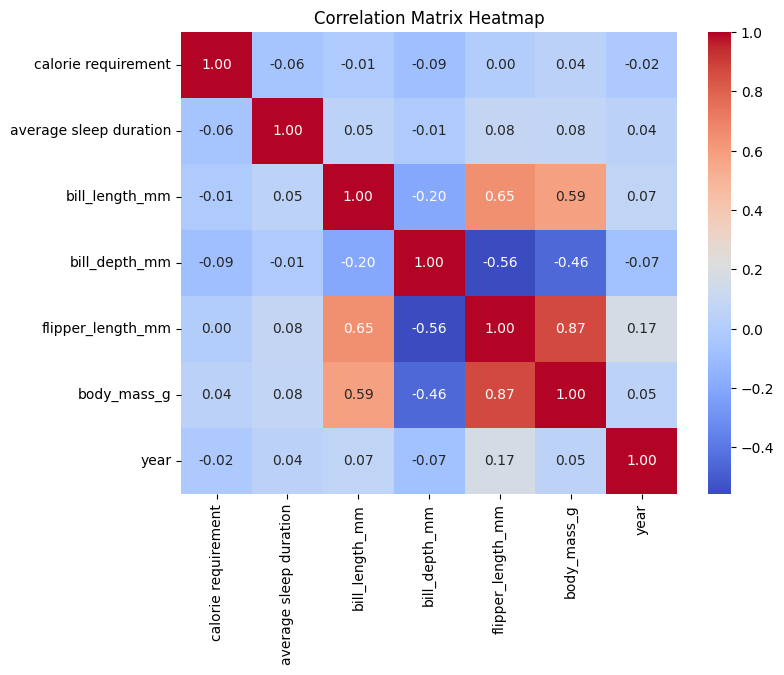

C:\Users\Sai\AppData\Local\Temp\ipykernel_11280\309230170.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df1, palette='Set2')


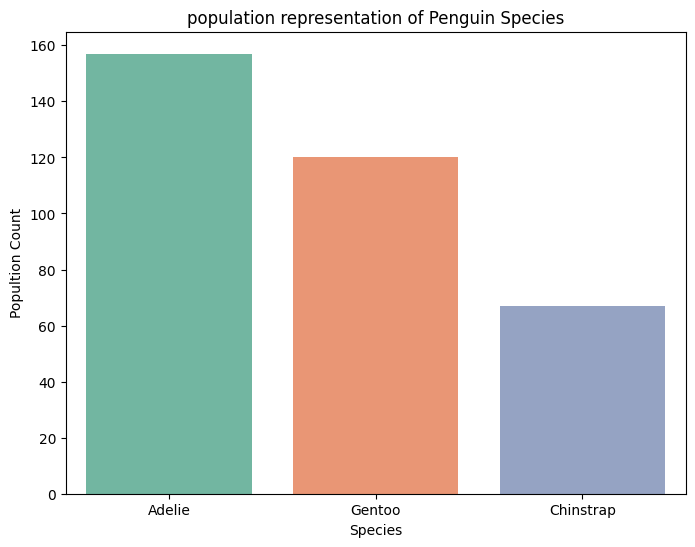

In [54]:
#!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#correction matrix for numerical columns
plt.figure(figsize=(8, 6))
correlation_matrix_g= df1.corr(numeric_only=True)  # Including only numeric columns for correlation
sns.heatmap(correlation_matrix_g, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


#countplot for penguin species
plt.figure(figsize=(8,6))
sns.countplot(x='species', data=df1, palette='Set2')
plt.title('population representation of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Popultion Count')
plt.show()

<Figure size 800x600 with 0 Axes>

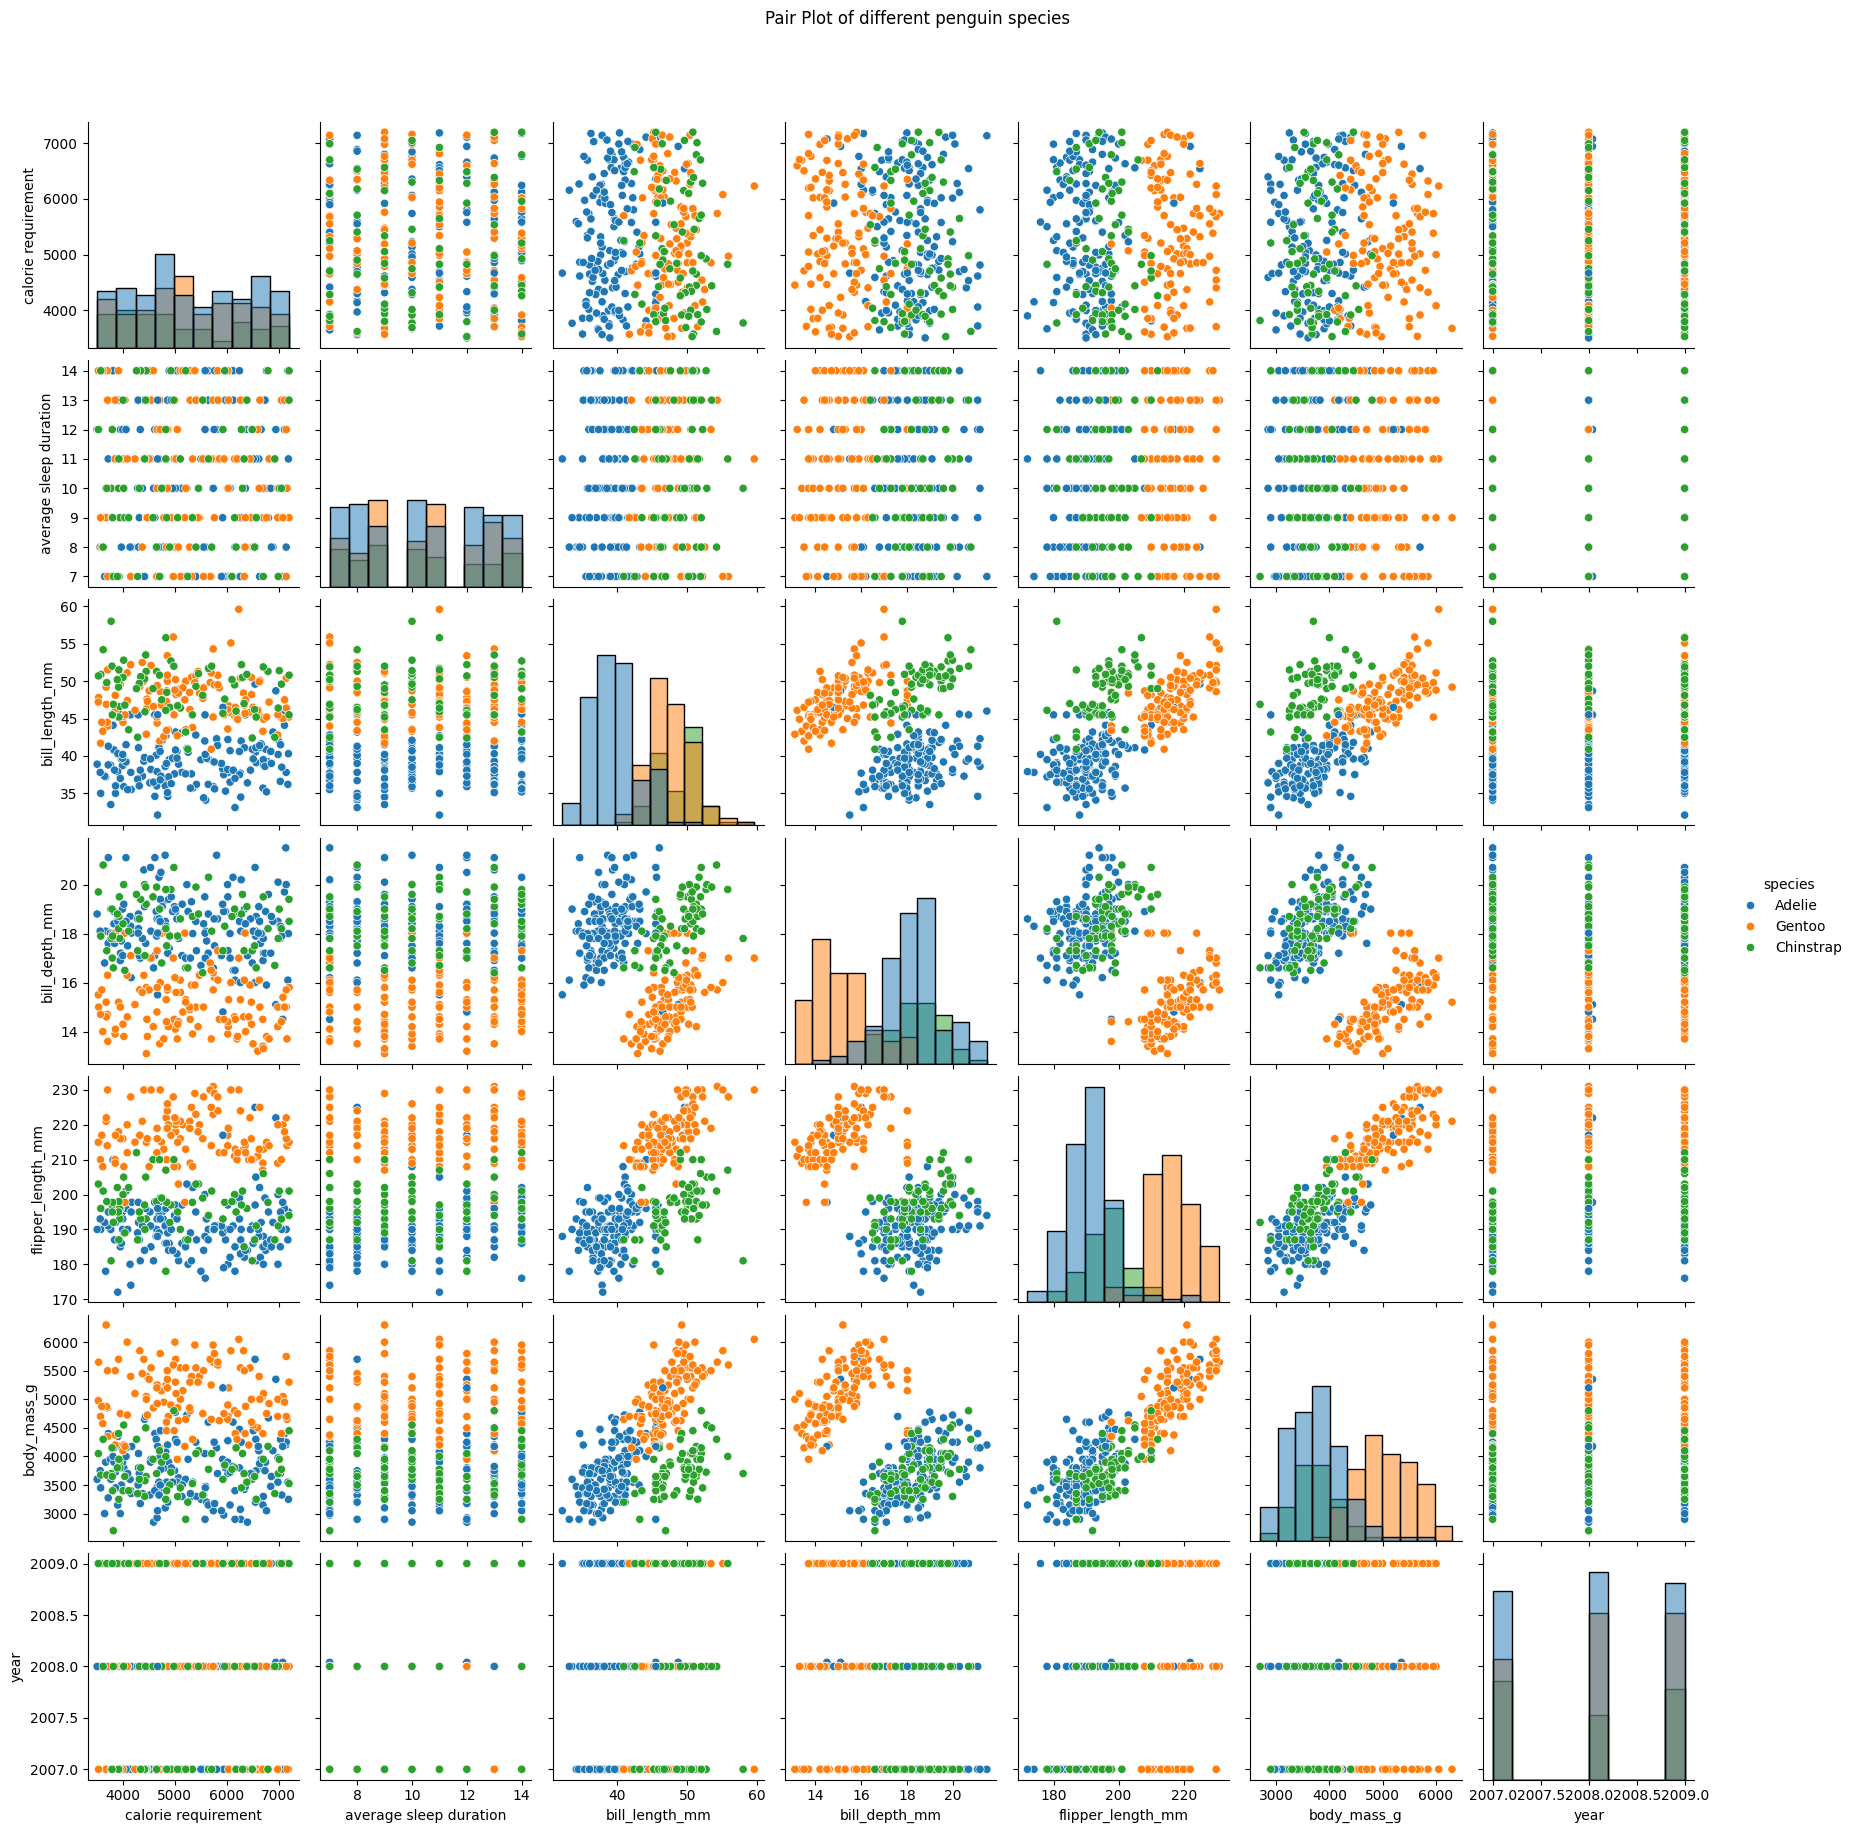

In [55]:
# pair plot
plt.figure(figsize=(8, 6))
sns.pairplot(df1, hue='species', diag_kind='hist')
plt.suptitle('Pair Plot of different penguin species', y=1.05)
plt.show()


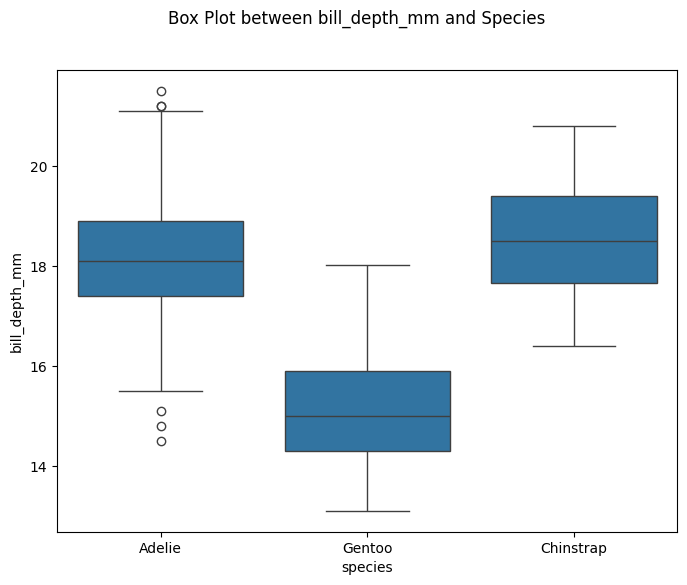

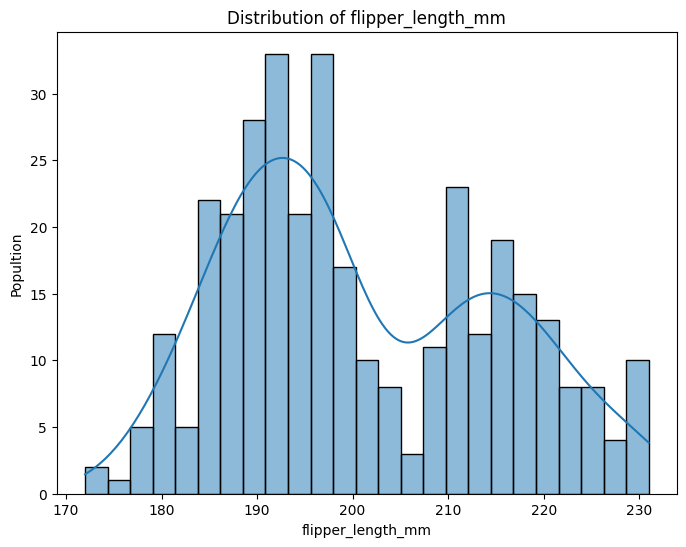

In [56]:
#boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(df1, x='species', y='bill_depth_mm')
plt.suptitle('Box Plot between bill_depth_mm and Species')
plt.show()

#frequency of specific flipper_length_mm
plt.figure(figsize=(8,6))
sns.histplot(df1['flipper_length_mm'], kde=True, bins=25)
plt.title('Distribution of flipper_length_mm')
plt.xlabel('flipper_length_mm')
plt.ylabel('Popultion')
plt.show()

In [57]:
#generating codes for Categorical columns using pd.Categorical methods
for i in categorical_columns:
    df1[f'{i}_numeric'] = pd.Categorical(df1[i]).codes
df1


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,species_numeric,island_numeric,gender_numeric
0,Adelie,Torgersen,6563.0,11.0,39.10,18.70,181.00,3750.000000,Male,2007.0,0,2,1
1,Adelie,Torgersen,4890.0,14.0,39.50,17.40,186.00,3800.000000,Female,2007.0,0,2,0
2,Adelie,Torgersen,7184.0,11.0,40.30,18.00,195.00,3250.000000,Female,2007.0,0,2,0
3,Adelie,Torgersen,4169.0,8.0,45.49,18.02,197.76,4175.463081,Male,2007.0,0,2,1
4,Adelie,Torgersen,4774.0,8.0,36.70,19.30,193.00,3450.000000,Female,2007.0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826.0,11.0,55.80,19.80,207.00,4000.000000,Male,2009.0,1,1,1
340,Chinstrap,Dream,4111.0,9.0,43.50,18.10,202.00,3400.000000,Female,2009.0,1,1,0
341,Chinstrap,Dream,7049.0,10.0,49.60,18.20,193.00,3775.000000,Male,2009.0,1,1,1
342,Chinstrap,Dream,4705.0,7.0,50.80,19.00,210.00,4100.000000,Male,2009.0,1,1,1


In [58]:
#Building the correlation matrix using corr method by considering "gender_numeric" as the target
correlation_matrix = df1.corr(numeric_only=True)
correlation_with_target = correlation_matrix['gender_numeric'].drop('gender_numeric')
#considering threshold value of 0.01
low_correlation_features= correlation_with_target[abs(correlation_with_target)<0.01].index
correlation_with_target
#low_correlation_features
df1=df1.drop(columns=low_correlation_features) #island numeric is dropped from the datafeame as it as low correlation.
df1

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,species_numeric,gender_numeric
0,Adelie,Torgersen,6563.0,11.0,39.10,18.70,181.00,3750.000000,Male,2007.0,0,1
1,Adelie,Torgersen,4890.0,14.0,39.50,17.40,186.00,3800.000000,Female,2007.0,0,0
2,Adelie,Torgersen,7184.0,11.0,40.30,18.00,195.00,3250.000000,Female,2007.0,0,0
3,Adelie,Torgersen,4169.0,8.0,45.49,18.02,197.76,4175.463081,Male,2007.0,0,1
4,Adelie,Torgersen,4774.0,8.0,36.70,19.30,193.00,3450.000000,Female,2007.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826.0,11.0,55.80,19.80,207.00,4000.000000,Male,2009.0,1,1
340,Chinstrap,Dream,4111.0,9.0,43.50,18.10,202.00,3400.000000,Female,2009.0,1,0
341,Chinstrap,Dream,7049.0,10.0,49.60,18.20,193.00,3775.000000,Male,2009.0,1,1
342,Chinstrap,Dream,4705.0,7.0,50.80,19.00,210.00,4100.000000,Male,2009.0,1,1


In [59]:
df1=df1.drop(columns=["island"]) #dropping island column as it has low correlation with respect to our target gender_numeric
df1

,species,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,species_numeric,gender_numeric
0,Adelie,6563.0,11.0,39.10,18.70,181.00,3750.000000,Male,2007.0,0,1
1,Adelie,4890.0,14.0,39.50,17.40,186.00,3800.000000,Female,2007.0,0,0
2,Adelie,7184.0,11.0,40.30,18.00,195.00,3250.000000,Female,2007.0,0,0
3,Adelie,4169.0,8.0,45.49,18.02,197.76,4175.463081,Male,2007.0,0,1
4,Adelie,4774.0,8.0,36.70,19.30,193.00,3450.000000,Female,2007.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,4826.0,11.0,55.80,19.80,207.00,4000.000000,Male,2009.0,1,1
340,Chinstrap,4111.0,9.0,43.50,18.10,202.00,3400.000000,Female,2009.0,1,0
341,Chinstrap,7049.0,10.0,49.60,18.20,193.00,3775.000000,Male,2009.0,1,1
342,Chinstrap,4705.0,7.0,50.80,19.00,210.00,4100.000000,Male,2009.0,1,1


In [60]:
# One-Hot Encoding for categorical columns i.e. 'species'and "gender"
columns_ohe=df1[['species','gender']]
for i in columns_ohe:
    df1= pd.get_dummies(df1, columns=[i], dtype=int)
df1


,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_numeric,gender_numeric,species_Adelie,species_Chinstrap,species_Gentoo,gender_Female,gender_Male
0,6563.0,11.0,39.10,18.70,181.00,3750.000000,2007.0,0,1,1,0,0,0,1
1,4890.0,14.0,39.50,17.40,186.00,3800.000000,2007.0,0,0,1,0,0,1,0
2,7184.0,11.0,40.30,18.00,195.00,3250.000000,2007.0,0,0,1,0,0,1,0
3,4169.0,8.0,45.49,18.02,197.76,4175.463081,2007.0,0,1,1,0,0,0,1
4,4774.0,8.0,36.70,19.30,193.00,3450.000000,2007.0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,4826.0,11.0,55.80,19.80,207.00,4000.000000,2009.0,1,1,0,1,0,0,1
340,4111.0,9.0,43.50,18.10,202.00,3400.000000,2009.0,1,0,0,1,0,1,0
341,7049.0,10.0,49.60,18.20,193.00,3775.000000,2009.0,1,1,0,1,0,0,1
342,4705.0,7.0,50.80,19.00,210.00,4100.000000,2009.0,1,1,0,1,0,0,1


In [61]:
#normalising the numerical columns like calorie requirement, average sleep duration, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g	
columns_n=df1[['calorie requirement', 'average sleep duration', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']]
for i in columns_n:
    min_val = df1[i].min()
    max_val = df1[i].max()
    df1[f'{i}_normalised'] = (df1[i] - min_val) / (max_val - min_val)
df1


,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_numeric,gender_numeric,species_Adelie,...,species_Gentoo,gender_Female,gender_Male,calorie requirement_normalised,average sleep duration_normalised,bill_length_mm_normalised,bill_depth_mm_normalised,flipper_length_mm_normalised,body_mass_g_normalised,year_normalised
0,6563.0,11.0,39.10,18.70,181.00,3750.000000,2007.0,0,1,1,...,0,0,1,0.828324,0.571429,0.254545,0.666667,0.152542,0.291667,0.0
1,4890.0,14.0,39.50,17.40,186.00,3800.000000,2007.0,0,0,1,...,0,1,0,0.375305,1.000000,0.269091,0.511905,0.237288,0.305556,0.0
2,7184.0,11.0,40.30,18.00,195.00,3250.000000,2007.0,0,0,1,...,0,1,0,0.996480,0.571429,0.298182,0.583333,0.389831,0.152778,0.0
3,4169.0,8.0,45.49,18.02,197.76,4175.463081,2007.0,0,1,1,...,0,0,1,0.180070,0.142857,0.486909,0.585714,0.436610,0.409851,0.0
4,4774.0,8.0,36.70,19.30,193.00,3450.000000,2007.0,0,0,1,...,0,1,0,0.343894,0.142857,0.167273,0.738095,0.355932,0.208333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,4826.0,11.0,55.80,19.80,207.00,4000.000000,2009.0,1,1,0,...,0,0,1,0.357975,0.571429,0.861818,0.797619,0.593220,0.361111,1.0
340,4111.0,9.0,43.50,18.10,202.00,3400.000000,2009.0,1,0,0,...,0,1,0,0.164365,0.285714,0.414545,0.595238,0.508475,0.194444,1.0
341,7049.0,10.0,49.60,18.20,193.00,3775.000000,2009.0,1,1,0,...,0,0,1,0.959924,0.428571,0.636364,0.607143,0.355932,0.298611,1.0
342,4705.0,7.0,50.80,19.00,210.00,4100.000000,2009.0,1,1,0,...,0,0,1,0.325210,0.000000,0.680000,0.702381,0.644068,0.388889,1.0


In [72]:
df1.to_csv('penguins_preprocessed.csv', index=False)

Referencee used in part 1:
1. https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/
2. https://seaborn.pydata.org/generated/seaborn.heatmap.html
3. https://seaborn.pydata.org/generated/seaborn.countplot.html
4. https://seaborn.pydata.org/generated/seaborn.countplot.html
5. https://seaborn.pydata.org/generated/seaborn.histplot.html
6. https://seaborn.pydata.org/generated/seaborn.pairplot.html
7. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

  Part2


In [74]:
'''
Referencee used in part 1:
1. https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/
2. https://seaborn.pydata.org/generated/seaborn.heatmap.html
3. https://seaborn.pydata.org/generated/seaborn.countplot.html
4. https://seaborn.pydata.org/generated/seaborn.countplot.html
5. https://seaborn.pydata.org/generated/seaborn.histplot.html
6. https://seaborn.pydata.org/generated/seaborn.pairplot.html
7. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
8. https://www.datacamp.com/tutorial/pickle-python-tutorial
'''

'\nReferencee used in part 1:\n1. https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/\n2. https://seaborn.pydata.org/generated/seaborn.heatmap.html\n3. https://seaborn.pydata.org/generated/seaborn.countplot.html\n4. https://seaborn.pydata.org/generated/seaborn.countplot.html\n5. https://seaborn.pydata.org/generated/seaborn.histplot.html\n6. https://seaborn.pydata.org/generated/seaborn.pairplot.html\n7. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html\n8. https://www.datacamp.com/tutorial/pickle-python-tutorial\n'